## Analysing Olympic Data

#### Introduction:

The dataset consist of details on the olympics held from 1896 to 2016.This dataset provides an opportunity to deep dive into analysis of various cavets of olympics history.Some of the points which I will consider for analysis include the countries participation,age distribution based on the game,medals tally,gold winners and more ...Lets begin.

#### Importing the necessary libraries:

In [1]:
import numpy as np #Linear algebra
import pandas as pd ## data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
warnings.filterwarnings('ignore')

#### Reading the dataset:

In [2]:
games=pd.read_csv('athlete_events.csv')
noc=pd.read_csv('noc_regions.csv')

In [3]:
## Glimpse of the data:
games.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


The dataset consist of olympic data ( both summer and winter olympics) starting from 1896.A quick google search on summer and winter olympics states that summer olympics is a much bigger event ( called The Olympics) started in 1896 and was first held in Athens,Greece whereas the winter olympics started from 1924 first held in Chamonix,France.


In [4]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


The dataset consist of listings of participants in the olympics with gender,age,height,weight,game participated and the medal won.The NOC refers to National Olympics Committe's code for each of the region.Lets do a quality check first to see the number of missing values in the dataset.

In [5]:
print(games.isnull().any())

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool


We find that Age,Height,Weight and Medal has missing information in them.

#### Year and Team Count:

Lets see the trend of the team participation over the olympic run since 1896.

In [6]:
team=games.groupby(['Year'])['Team'].nunique().reset_index()
team.rename({'Team':'Team_Count'},inplace=True,axis=1)
team.head()

,Year,Team_Count
0,1896,18
1,1900,190
2,1904,79
3,1906,52
4,1908,73


In [7]:
trace = go.Scatter(
                x=team['Year'],
                y=team['Team_Count'],
                name = "Team Participation in Olympics",
                line = dict(color = '#17BECF'),
                opacity = 0.8,
                mode="lines+markers"
                )

data = [trace]

layout = dict(
    title = "Team Participation in Olympics(Both Summer and Winter )",
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Team Participation in Olympics")

The number of teams to represent olympics has hovered around 110 to 260 mark.There were 292 teams representing the olympics during the year 2008 while the year 1906 has seen the lowest representation - 52 teams.

###  Distribution of Age,Height and Weight:

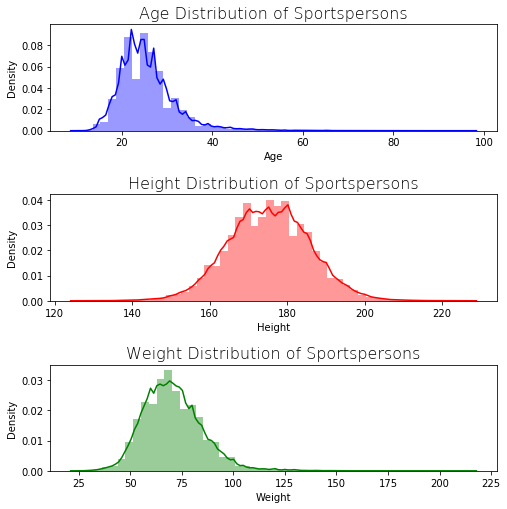

In [8]:
plt.figure(figsize=(8,8))
plt.subplot(311)
ax=sns.distplot(games['Age'].dropna(),color='blue',kde=True)
ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.set_title('Age Distribution of Sportspersons',fontsize=16,fontweight=200)
plt.subplot(312)
ax1=sns.distplot(games['Height'].dropna(),color='Red',kde=True)
ax1.set_xlabel('Height')
ax1.set_ylabel('Density')
ax1.set_title('Height Distribution of Sportspersons',fontsize=16,fontweight=200)
plt.subplot(313)
ax2=sns.distplot(games['Weight'].dropna(),color='green',kde=True)
ax2.set_xlabel('Weight')
ax2.set_ylabel('Density')
ax2.set_title('Weight Distribution of Sportspersons',fontsize=16,fontweight=200)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)

* It is seen that all the three distributions are normal.
* The mean of age centered around 26 years.The distribution can be called as bimodal since there are two peaks - one round 22 years and the other around 30 years.
* The height distribution is a perfect bell shaped curve with the mean at the center.The mean and median height is around 175 . 
* It can be said that by looking at the weight distribution it is skewed to the right.The mean value is aroung 65.

Now let us look at the actual values to know if our interpretations are correct.

In [9]:
games.drop(['ID','Year'],axis=1).describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


Our assumptions are indeed correct.

#### Olympic Cities :

Let us know about the cities where the olympics have taken place since 1896.

In [10]:
Year=games.groupby('City').apply(lambda x:x['Year'].unique()).to_frame().reset_index()
Year.columns=['City','Years']
Year['Count']=[len(c) for c in Year['Years']]

In [11]:
Year.sort_values('Count',ascending=False)

,City,Years,Count
3,Athina,"[2004, 1906, 1896]",3
17,London,"[2012, 1948, 1908]",3
30,Sankt Moritz,"[1928, 1948]",2
26,Paris,"[1900, 1924]",2
37,Stockholm,"[1912, 1956]",2
18,Los Angeles,"[1932, 1984]",2
15,Lake Placid,"[1980, 1932]",2
14,Innsbruck,"[1964, 1976]",2
0,Albertville,[1992],1
27,Rio de Janeiro,[2016],1


It is seen that Olympic events has taken place thrice in the city of Athina,London whereas twice the games have been held at Sankt Moritz,Paris,Stockholm,Los Angeles,Lake Placid,Innsbruck.

#### How many games ?

Let us see how many sports have been included over the years in olympics.

In [12]:
sports=games.groupby('Year').Sport.nunique().to_frame().reset_index()

In [13]:
sports.columns=['Year','Count of Sport']


In [14]:
trace1 = go.Scatter(
                x=sports['Year'],
                y=sports['Count of Sport'],
                name = "Sports in Olympics",
                line = dict(color = '#17BECD'),
                opacity = 0.8,
                mode="lines+markers"
                )

data1 = [trace1]

layout1 = dict(
    title = "Representation of Sports (Count) in Olympics(Summer and Winter)",
)

fig = dict(data=data1, layout=layout1)
py.iplot(fig, filename = "Sport Count")

Though it is easy to conclude from the graph that the count of sport is fluctuation it will give more sense if we consider Summer and Winter olympic sporting separately.

#### Summer Olympic Sports:

In [15]:
sports=games.groupby(['Year','Season']).Sport.nunique().to_frame().reset_index()

Text(0.5,1,'Sports in Olympics')

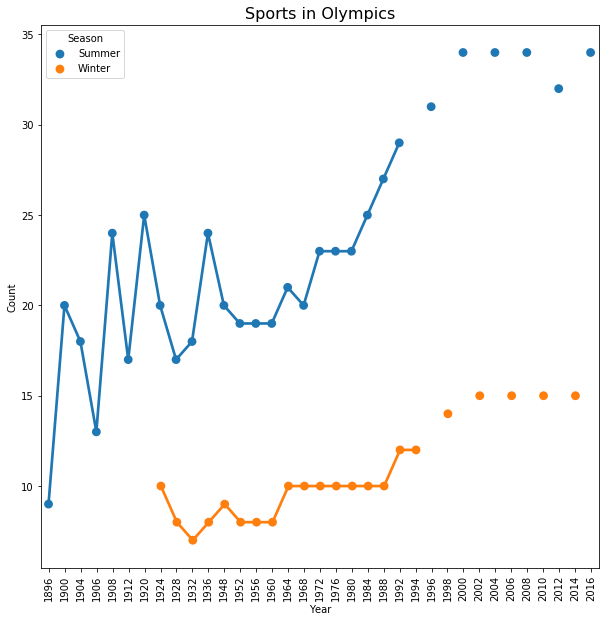

In [16]:
plt.figure(figsize=(10,10))
ax=sns.pointplot(x=sports['Year'],y=sports['Sport'],hue=sports['Season'],dodge=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Year',fontsize=10)
ax.set_ylabel('Count',fontsize=10)
ax.set_title('Sports in Olympics',fontsize=16)

#### Sport in Olympics:

Having understood the count of sport in olympics lets see how many sports have been there since inception and which are relatively new sports.We will use an analysis similar to olympic cities.

In [17]:
### Sport in Summer Olympics:
summer_olympic=games[games['Season']=='Summer']
Sport_Count=summer_olympic.groupby('Sport').apply(lambda x:x['Year'].unique()).to_frame().reset_index()
Sport_Count.columns=['Sport','Years']
Sport_Count['Count']=[len(c) for c in Sport_Count['Years']]


In [18]:
Sport_Count['Years']=pd.Series(Sport_Count['Years'])
Sport_Count['Years']=Sport_Count['Years'].apply(lambda x:sorted(x))  ### Sort Year in ascending order inside the Year column.

In [19]:
Sport_Count.sort_values('Count',ascending=False,inplace=True)
Sport_Count

,Sport,Years,Count
21,Gymnastics,"[1896, 1900, 1904, 1906, 1908, 1912, 1920, 192...",29
40,Swimming,"[1896, 1900, 1904, 1906, 1908, 1912, 1920, 192...",29
17,Fencing,"[1896, 1900, 1904, 1906, 1908, 1912, 1920, 192...",29
4,Athletics,"[1896, 1900, 1904, 1906, 1908, 1912, 1920, 192...",29
14,Cycling,"[1896, 1900, 1904, 1906, 1908, 1912, 1920, 192...",29
34,Rowing,"[1900, 1904, 1906, 1908, 1912, 1920, 1924, 192...",28
51,Wrestling,"[1896, 1904, 1906, 1908, 1912, 1920, 1924, 192...",28
38,Shooting,"[1896, 1900, 1906, 1908, 1912, 1920, 1924, 193...",27
49,Water Polo,"[1900, 1904, 1908, 1912, 1920, 1924, 1928, 193...",27
15,Diving,"[1904, 1906, 1908, 1912, 1920, 1924, 1928, 193...",27


Gymnastics,Swimming,Fencing,Athletics,Cycling have been there since inception from 1896 whereas Rugby Sevens is a relatively new sport included in 2016 olympics.

Lets carry out similar analysis for winter olympics.

In [20]:
### Sport in Winter Olympics:
Winter_olympic=games[games['Season']=='Winter']
Winter_Count=Winter_olympic.groupby('Sport').apply(lambda x:x['Year'].unique()).to_frame().reset_index()
Winter_Count.columns=['Sport','Years']
Winter_Count['Count']=[len(c) for c in Winter_Count['Years']]


In [21]:
#Winter_Count['Years']=pd.Series(Winter_Count['Years'])
Winter_Count['Years']=Winter_Count['Years'].apply(lambda x:sorted(x))

In [22]:
Winter_Count.sort_values('Count',ascending=False)

,Sport,Years,Count
8,Ice Hockey,"[1924, 1928, 1932, 1936, 1948, 1952, 1956, 196...",22
6,Figure Skating,"[1924, 1928, 1932, 1936, 1948, 1952, 1956, 196...",22
14,Ski Jumping,"[1924, 1928, 1932, 1936, 1948, 1952, 1956, 196...",22
11,Nordic Combined,"[1924, 1928, 1932, 1936, 1948, 1952, 1956, 196...",22
16,Speed Skating,"[1924, 1928, 1932, 1936, 1948, 1952, 1956, 196...",22
4,Cross Country Skiing,"[1924, 1928, 1932, 1936, 1948, 1952, 1956, 196...",22
3,Bobsleigh,"[1924, 1928, 1932, 1936, 1948, 1952, 1956, 196...",21
0,Alpine Skiing,"[1936, 1948, 1952, 1956, 1960, 1964, 1968, 197...",19
2,Biathlon,"[1960, 1964, 1968, 1972, 1976, 1980, 1984, 198...",15
9,Luge,"[1964, 1968, 1972, 1976, 1980, 1984, 1988, 199...",14


* Ice Hockey,Figure Skating,Ski Jumping,Nordic Combined,Speed Skating ,Cross Country Skiing and Bobsleigh have been there since inception whereas snowboarding is a new sport which has been there since 1998.
* Thre are two sports - Alpinish amd Military Ski patrol which has been played in winter olympics only once .

#### Overall Medals Tally:

Let us visualise the  all time medals tally of countries 

In [23]:
game_noc=pd.merge(games,noc,how='left',on='NOC')
game_noc.drop_duplicates(inplace=True,keep=False)

In [24]:
medal=game_noc.groupby(['region','Medal'])['Medal'].count()
medal=medal.unstack(level=-1,fill_value=0).reset_index()
medal.head()

Medal,region,Bronze,Gold,Silver
0,Afghanistan,2,0,0
1,Algeria,8,5,4
2,Argentina,91,91,92
3,Armenia,9,2,5
4,Australia,522,368,459


In [25]:
medal['Total']=medal['Bronze']+medal['Gold']+medal['Silver']
total_games=game_noc.groupby('region')['Sport'].nunique().to_frame().reset_index()
total_games.rename({'Sport':'TotalGames'},inplace=True,axis=1)
#total_games.head()

In [26]:
medal=pd.merge(medal,total_games,how='left',on='region')
medal.sort_values('Total',ascending=False,inplace=True)


In [27]:
medal=medal[['region','TotalGames','Gold','Silver','Bronze','Total']]  ### Reordering the columns
medal.head(10)

,region,TotalGames,Gold,Silver,Bronze,Total
125,USA,58,2638,1641,1358,5637
100,Russia,49,1599,1170,1178,3947
41,Germany,53,1301,1195,1260,3756
124,UK,59,676,739,651,2066
38,France,57,497,594,666,1757
57,Italy,52,575,531,531,1637
112,Sweden,47,479,522,535,1536
18,Canada,53,463,438,451,1352
4,Australia,52,368,459,522,1349
48,Hungary,42,432,332,371,1135


The above table shows the overall medals tally of the countries participated in the Olympics from 1896 to 2016.USA leads the overall medals tally with 5637 medals followed by Russia and Germany.The difference between the medal count for first and second place is too high -aroung 2000 medals.Lets visualise this with the bar plot.

Text(0.5,1,'Total Medal Count of Top 10 Countries in Olympics')

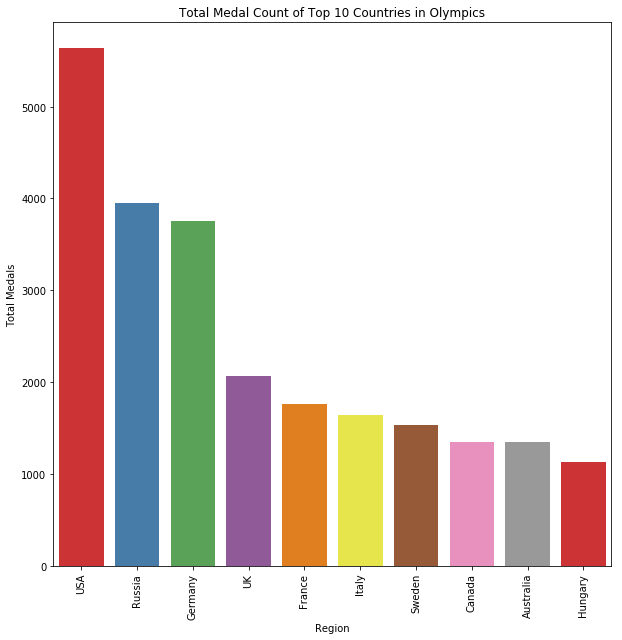

In [28]:
plt.figure(figsize=(10,10))
ax=sns.barplot(medal['region'].head(10),medal['Total'].head(10),palette=sns.color_palette('Set1',10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Region',fontsize=10)
ax.set_ylabel('Total Medals',fontsize=10)
ax.set_title('Total Medal Count of Top 10 Countries in Olympics')

#### Medals Analysis for USA

Let us now see the Olympic Champions as well as the sports who have contributed to the medals tally for USA.

In [29]:
USA_Gold=game_noc[(game_noc['region']=='USA') & (game_noc['Medal']=='Gold')]
champ=USA_Gold.groupby('Sport').size().to_frame().reset_index()
champ.columns=['Sport','Count']

In [30]:
champ.sort_values(by='Count',ascending=False,inplace=True)

Text(0.5,1,'Games where USA has won Gold maximum times')

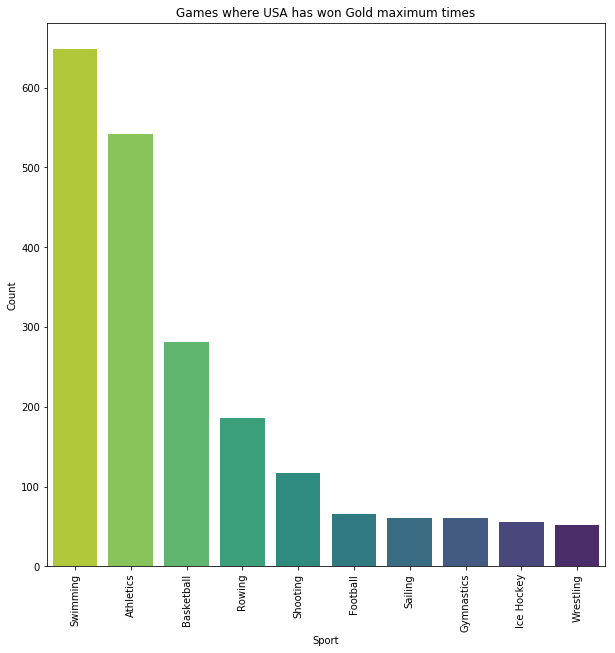

In [31]:
plt.figure(figsize=(10,10))
ax=sns.barplot(champ['Sport'].head(10),champ['Count'].head(10),palette=sns.color_palette('viridis_r',10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=10)
ax.set_ylabel('Count',fontsize=10)
ax.set_title('Games where USA has won Gold maximum times')

USA has won maximum gold from Swimming,Athletics,Basketball.

Lets see who has won maximum gold and in which sport for USA.

In [32]:
champ=USA_Gold.groupby(['Name','Sport']).size().to_frame().reset_index()


In [33]:
champ.columns=['Name','Sport','Golds']
#champ.head()
champ.sort_values(by='Golds',ascending=False,inplace=True)
champ.head(10)

,Name,Sport,Golds
1305,"Michael Fred Phelps, II",Swimming,23
1467,"Raymond Clarence ""Ray"" Ewry",Athletics,10
1221,Mark Andrew Spitz,Swimming,9
608,"Frederick Carlton ""Carl"" Lewis",Athletics,9
1258,"Matthew Nicholas ""Matt"" Biondi",Swimming,8
858,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,8
438,"Donald Arthur ""Don"" Schollander",Swimming,7
64,Amy Deloris Van Dyken (-Rouen),Swimming,6
47,Allyson Michelle Felix,Athletics,6
1592,Ryan Steven Lochte,Swimming,6


Michael Phelps has won **Gold** 23 times followed by Raymold Clarence Ray Ewry 10 times in Athletics.

Lets see how many events has Phelps participated.

In [34]:
Phelps=game_noc[(game_noc['Name']=='Michael Fred Phelps, II' ) & (game_noc['Medal']=='Gold')]
print("Swimming Event where Phelps has won Gold\n",Phelps['Event'].unique)


Swimming Event where Phelps has won Gold
 <bound method Series.unique of 187890    Swimming Men's 4 x 200 metres Freestyle Relay
187891              Swimming Men's 100 metres Butterfly
187892              Swimming Men's 200 metres Butterfly
187893      Swimming Men's 200 metres Individual Medley
187894      Swimming Men's 400 metres Individual Medley
187895       Swimming Men's 4 x 100 metres Medley Relay
187896              Swimming Men's 200 metres Freestyle
187897    Swimming Men's 4 x 100 metres Freestyle Relay
187898    Swimming Men's 4 x 200 metres Freestyle Relay
187899              Swimming Men's 100 metres Butterfly
187900              Swimming Men's 200 metres Butterfly
187901      Swimming Men's 200 metres Individual Medley
187902      Swimming Men's 400 metres Individual Medley
187903       Swimming Men's 4 x 100 metres Medley Relay
187905    Swimming Men's 4 x 200 metres Freestyle Relay
187906              Swimming Men's 100 metres Butterfly
187908      Swimming Men's 200 

How many olympic events has Phelps participated ?

In [35]:
game_noc[game_noc['Name']=='Michael Fred Phelps, II'].Year.nunique()

5

Thus we see that Phelps has raked up 23 gold's in 5 years of his olympic stint.

#### Gold Hunters

In [36]:
gold=game_noc.loc[game_noc['Medal']=='Gold'].groupby(['Name','Sport','region']).size().to_frame().reset_index()
gold.columns=['Name','Sport','region','count']
gold.sort_values('count',ascending=False,inplace=True)
gold.head(10)

,Name,Sport,region,count
6653,"Michael Fred Phelps, II",Swimming,USA,23
7858,"Raymond Clarence ""Ray"" Ewry",Athletics,USA,10
5605,Larysa Semenivna Latynina (Diriy-),Gymnastics,Russia,9
6356,Mark Andrew Spitz,Swimming,USA,9
2936,"Frederick Carlton ""Carl"" Lewis",Athletics,USA,9
7407,Paavo Johannes Nurmi,Athletics,Finland,9
4503,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,USA,8
1106,Birgit Fischer-Schmidt,Canoeing,Germany,8
7241,Ole Einar Bjrndalen,Biathlon,Norway,8
8405,Sawao Kato,Gymnastics,Japan,8


Phelps tops this list too and leads with a record breaking 23 gold followed by Raymold with 10 medals.

#### Height,Weight and Age according to sports:

The following block of analysis is inspired by comments from Andreas Stockl .Thanks Andreas.

In [37]:
### Considering only sports that were played from inception so that we have a good comparion with lot of data !!!!.
sport_box=game_noc[game_noc['Sport'].isin(Sport_Count.Sport[:10])]

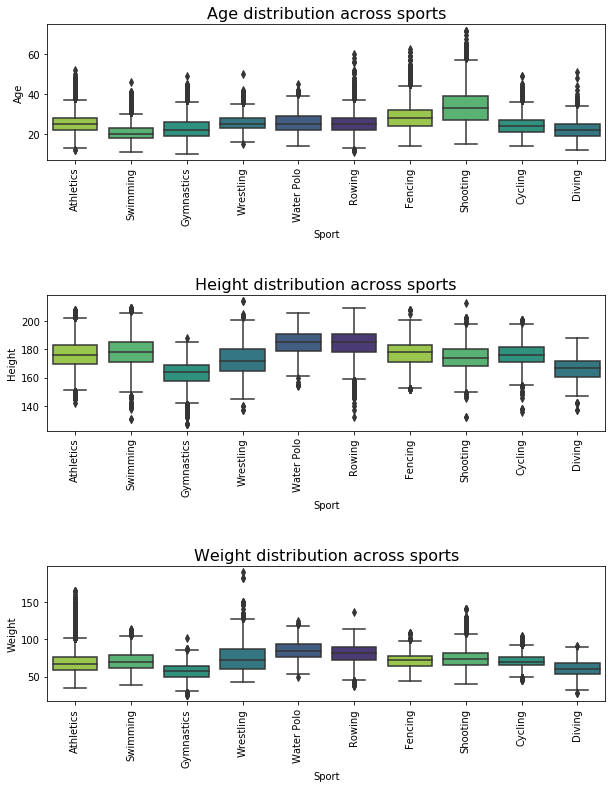

In [39]:
plt.figure(figsize=(10,8))
plt.subplot(311)
ax=sns.boxplot(x='Sport',y='Age',data=sport_box,palette=sns.color_palette(palette='viridis_r'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=10)
ax.set_ylabel('Age',fontsize=10)
ax.set_title('Age distribution across sports',fontsize=16)
plt.subplot(312)
ax=sns.boxplot(x='Sport',y='Height',data=sport_box,palette=sns.color_palette(palette='viridis_r'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=10)
ax.set_ylabel('Height',fontsize=10)
ax.set_title('Height distribution across sports',fontsize=16)
plt.subplot(313)
ax=sns.boxplot(x='Sport',y='Weight',data=sport_box,palette=sns.color_palette(palette='viridis_r'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=10)
ax.set_ylabel('Weight',fontsize=10)
ax.set_title('Weight distribution across sports',fontsize=16)
plt.subplots_adjust(wspace = 1, hspace = 1,top = 1.3)

* There is a difference between height,weight and age for every sports.

* In the age chart,we see that there are many outliers and there were persons of age more than 60 years.Really ???

* Rowing has sportspersons with less than 20 years of years.

* The median height for Water polo and Rowing is higher followed by Athletics and swimming.

* The maximum height has been for Wrestling !!!

* For weight,Athletics seems to have many outliers.while Wrestling has sportspersons with weight of more than 150 kgs which is perfectly understood.

#### Conclusion:

Woah !!! What a fun it has been analysing this dataset.The data provided a blend of both numeric and factorial variables that could be used to find the relationships between the variables and narrow down our answers.Though I stop here ,there are many areas which could be drilled down futher.

I hope that my kernel provided an interesting viewpoint on this dataset and you were able to pick up few ideas from this for your analysis.Thank you for reading.

**If you find it interesting,pls comment/upvote.**Thanks again...